Video Game Reviews Text Analysis

By Fei Guo, Victor Li, Jonathan Lin, Xinyu Zheng

INFX 575 Merge Data and get summary statistics

In [8]:
# import pandas
import pandas as pd

In [9]:
# import Giant Bomb
gb = pd.read_csv("giantbomb/giantbomb_reviews.csv", encoding='utf-8')

In [10]:
# import IGN
colHeader = ['game','date','reviewer','link','review', 'platforms', 'score']
IGN = pd.read_csv('IGN/IGN_1.csv', names = colHeader)
IGN['site'] = 'IGN'
IGN['score_100'] = 10*IGN['score']

In [11]:
# import Game Spot
colHeader2 = ['reviewer', 'date', 'game', 'link', 'score', 'platforms', 'review']
gamespot = pd.read_csv('gamespot/GAMESPOT.csv', names = colHeader2)
gamespot['site'] = 'GameSpot'
gamespot['score_100'] = 10*gamespot['score']

In [12]:
# import Game Spot
colHeader2 = ['reviewer', 'date', 'game', 'link', 'score', 'platforms', 'review']
gamespot = pd.read_csv('gamespot/GAMESPOT_UPDATED.csv', names = colHeader2)
gamespot['site'] = 'GameSpot'
gamespot['score_100'] = 10*gamespot['score']

In [13]:
# convert date columns to datetime
gamespot["date"] = pd.to_datetime(gamespot.date, dayfirst=True)
IGN["date"] = pd.to_datetime(IGN.date, dayfirst=True)
gb["date"] = pd.to_datetime(gb.date, dayfirst=False)

In [14]:
results = pd.concat([gb, IGN, gamespot], ignore_index=True)

In [15]:
# fix game titles for gamespot
results['game'] = results['game'].str.replace(' Review - GameSpot', '')

In [16]:
results.to_csv('results.csv', encoding='utf-8', index=False)

In [17]:
results.shape

(1850, 9)

In [28]:
# import libraries for data manipulation
from bs4 import BeautifulSoup
import urllib2
import requests
import re
import os
import numpy as np

In [29]:
# matplotlib for graphic plots
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
%matplotlib inline
from matplotlib import rcParams
# Set inline graph size and font size
rcParams['figure.figsize'] = (24, 24)
rcParams['font.size'] = 12
from pandas.tools.plotting import scatter_matrix
matplotlib.style.use('ggplot')

In [21]:
grouped = gb_means.groupby(['site', 'reviewer'])
calculated_means = grouped.mean()

In [30]:
results['review_length'] = np.nan
for index, row in results.iterrows():
    results.loc[index, 'review_length'] = len(row['review'].split())

In [31]:
results.to_csv('results.csv', encoding='utf-8', index=False)

In [23]:
# group by site theen reviewer
grouped = results.groupby(['site', 'reviewer'])
# calculate mean of each review's scores and review lengths
calculated_means = grouped.mean()
# find number or reviews per reviewer
grouped_size = grouped.size().order()

by_reviewer_summary = grouped['review_length'].agg([np.sum, np.mean, np.std])


In [24]:
# compute summary statistics on review length by reviewer
by_reviewer_summary = grouped['review_length'].agg([np.sum, np.mean, np.std])


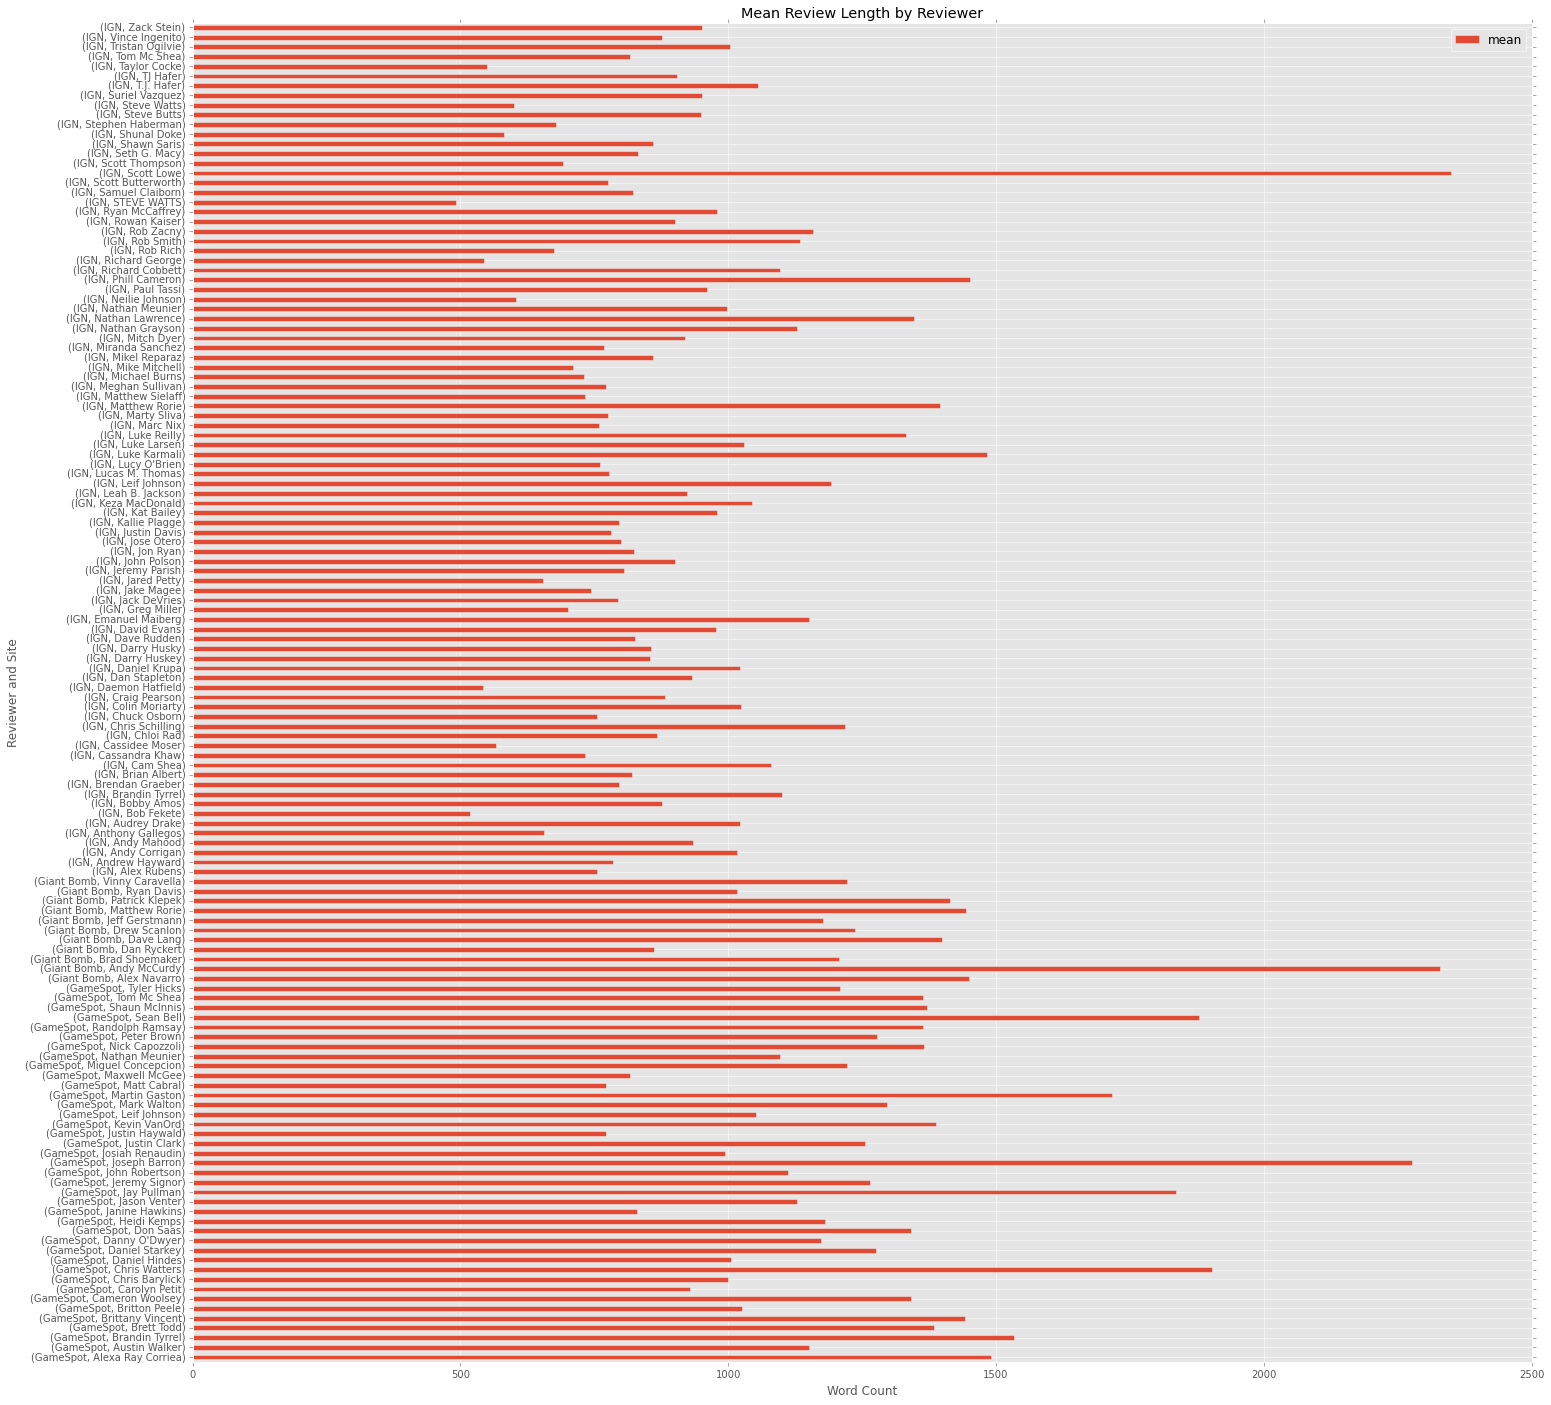

In [25]:
# bar chart by mean review length
by_reviewer_summary[['mean']].plot(kind='barh' )

plt.title("Mean Review Length by Reviewer") 
plt.xlabel("Word Count")
plt.ylabel("Reviewer and Site") 
plt.savefig('foo.png')

In [26]:
# group by site
by_site = results.groupby(['site'])
# summarize review length statistics sum, mean and standard deviation
by_site_summary = by_site['review_length'].agg([np.sum, np.mean, np.std])
print by_site_summary

               sum         mean         std
site                                       
GameSpot    524649  1249.164286  415.072647
Giant Bomb  800745  1215.091047  465.193875
IGN         695245   901.744488  334.284241


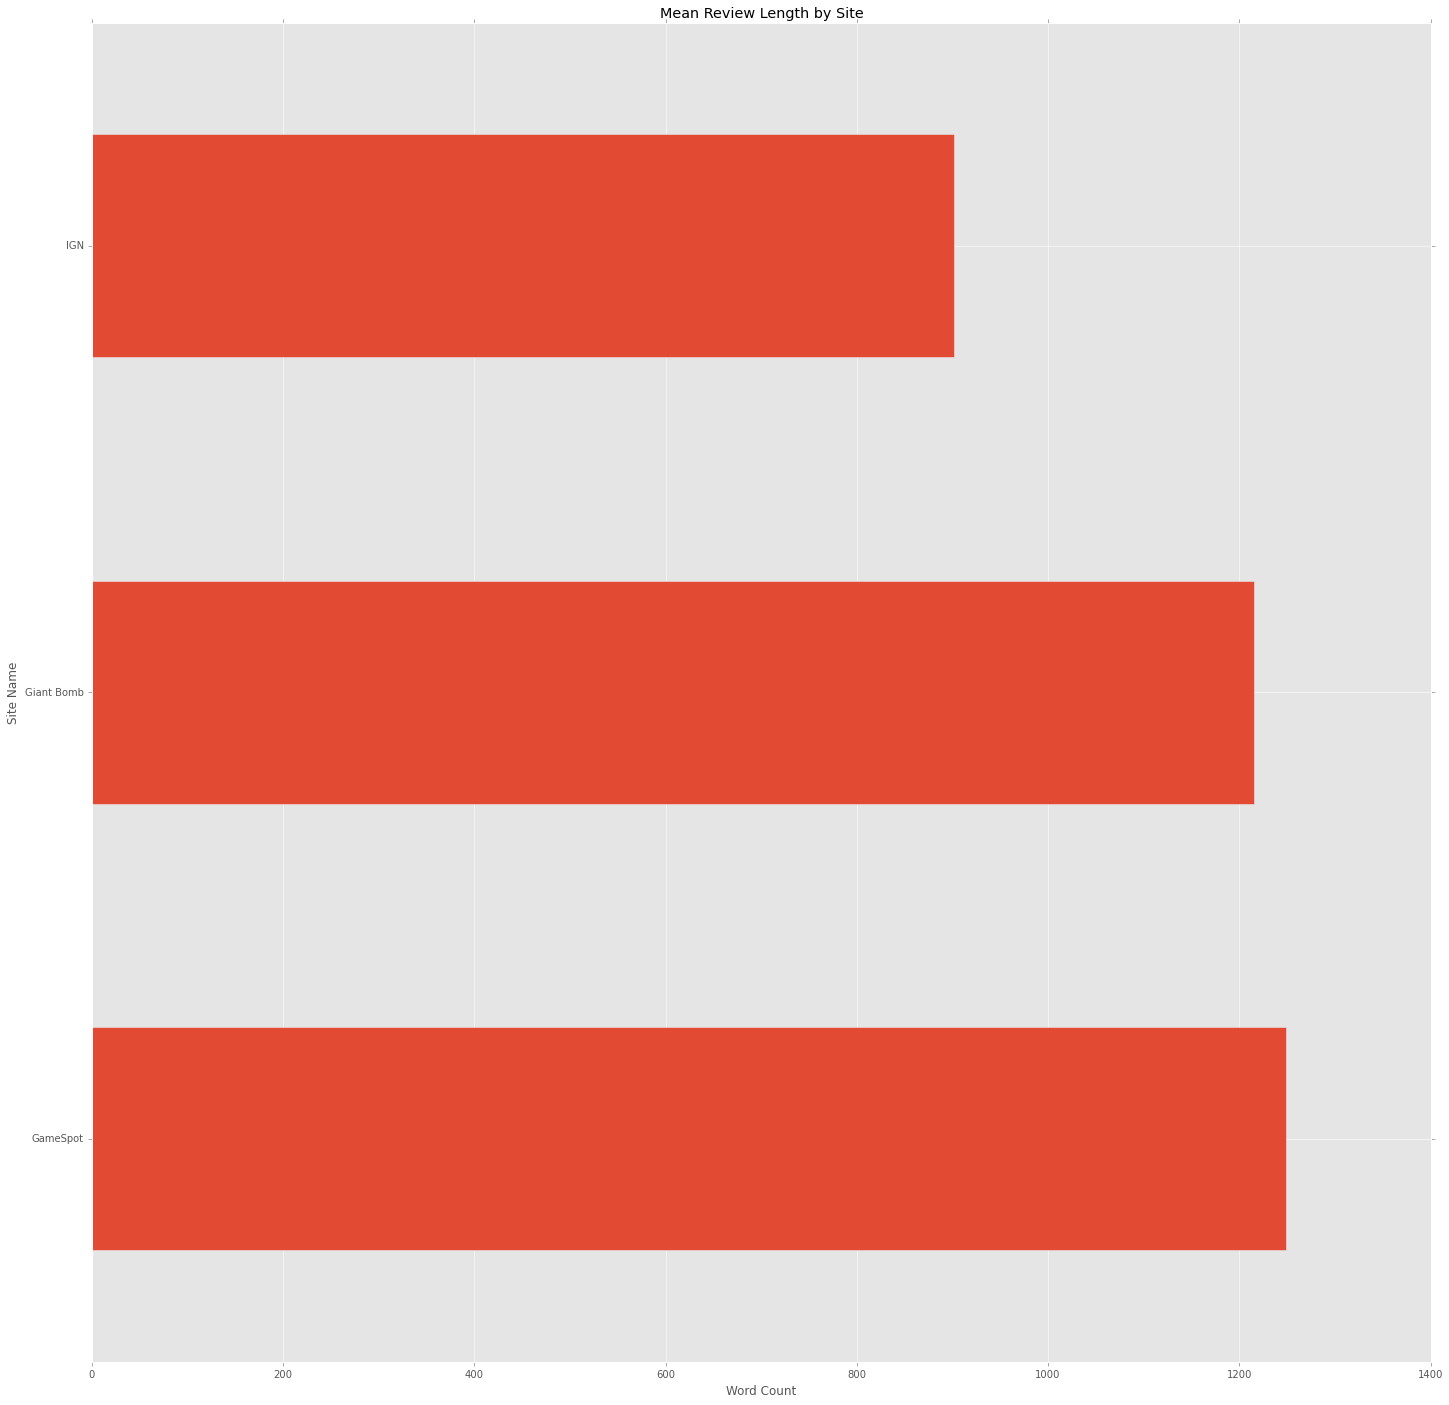

In [27]:
# bar chart by mean review length
by_site_summary['mean'].plot(kind='barh')

plt.title("Mean Review Length by Site") 
plt.xlabel("Word Count")
plt.ylabel("Site Name") 


In [36]:
calculated_means.to_csv('calculated_means.csv', encoding='utf-8', index=True)

In [37]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
%matplotlib inline
from pandas.tools.plotting import scatter_matrix
matplotlib.style.use('ggplot')

c:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


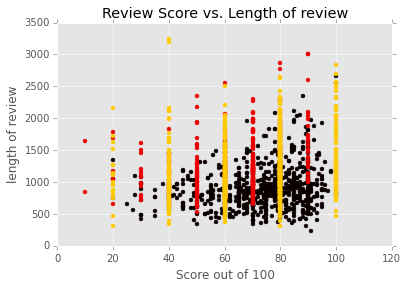

In [38]:
# get scatter of scores and review length
x = results['score_100']
y = results['review_length']

# Get unique names of
uniq = list(set(results['site']))

# Set the color map to match the number of species
z = range(1,len(uniq))
hot = plt.get_cmap('hot')
cNorm  = colors.Normalize(vmin=0, vmax=len(uniq))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=hot)

# Plot each species
for i in range(len(uniq)):
    indx = results['site'] == uniq[i]
    plt.scatter(x[indx], y[indx], s=15, color=scalarMap.to_rgba(i))

plt.xlabel('Score out of 100')
plt.ylabel('length of review')
plt.title('Review Score vs. Length of review')
plt.legend()
plt.show()
plt.savefig('foo.png')

In [39]:
grouped = results.groupby(['site', 'reviewer'])
calculated_means = grouped.mean().median()

In [40]:
sites = ['Giant Bomb', 'IGN', 'GameSpot']

In [41]:
groups = results.groupby(['site'])
groups_mean = groups.mean()

In [42]:
groups_mean

,review_length,score,score_100
site,,,
GameSpot,1249.164286,6.561905,65.619048
Giant Bomb,1215.091047,3.525038,70.500759
IGN,901.744488,7.379377,73.793774


In [43]:
groups.reviewer.nunique()

site
GameSpot      39
Giant Bomb    11
IGN           88
Name: reviewer, dtype: int64

In [44]:
groups.game.nunique()

site
GameSpot      387
Giant Bomb    639
IGN           710
Name: game, dtype: int64

In [45]:
groups.game.nunique()

site
GameSpot      387
Giant Bomb    639
IGN           710
Name: game, dtype: int64

In [46]:
by_platform = results.groupby(['site', 'platforms'])
by_platform.mean()

review_length  \
site     platforms                                                                                                
GameSpot 3DS                                                                                        1232.772727   
         3DS & Wii U                                                                                 777.000000   
         PC                                                                                         1203.021505   
         PC & 3DS & Wii U                                                                           1261.000000   
         PC & PS3                                                                                   1295.000000   
         PC & PS4                                                                                   1221.000000   
         PC & Xbox 360 & PS3                                                                        1459.000000   
         PC & Xbox One & PS4                                                                        2014.666667   
         PC & iPhone/iPod                                                                            607.000000   
         PS3                                                                                        1227.058824   
         PS3 & PlayStation Vita & PS4                                                                991.000000   
         PS3 & Xbox 360                                                                             1246.000000   
         PS3 & Xbox 360 & PC                                                                         893.000000   
         PS4                                                                                        1277.901639   
         PS4 & PC                                                                                   1254.000000   
         PS4 & PC & Xbox One                                                                        3011.000000   
         PS4 & PS3 & PlayStation Vita                                                               1394.000000   
         PS4 & PS3 & Xbox 360 & Xbox One                                                            1193.000000   
         PS4 & PlayStation Vita                                                                     1073.000000   
         PS4 & PlayStation Vita & PS3                                                                791.000000   
         PS4 & Xbox One                                                                             1493.428571   
         PlayStation Vita                                                                           1191.000000   
         PlayStation Vita & PS3 & PS4 & PC                                                           742.000000   
         PlayStation Vita & PS4                                                                     1160.000000   
         Wii U                                                                                      1144.600000   
         Xbox 360                                                                                    983.142857   
         Xbox 360 & PC                                                                              1220.000000   
         Xbox 360 & PS3                                                                             1113.333333   
         Xbox 360 & PS3 & PC                                                                        1065.000000   
         Xbox One                                                                                   1311.000000   
...                                                                                                         ...   
IGN      PlayStation 4, PC, PlayStation 3 and PlayStation Vita                                      1099.000000   
         PlayStation 4, PC, PlayStation 3, Xbox 360 and Xbox One                                    1347.000000   
         PlayStation 4, PlayStation 3 and Wii U                          